# Importing Libraries

In [ ]:
import pandas as pd

# Load the dataset
dataset = pd.read_csv(r"C:\Users\DELL\Downloads\HousePricePrediction.xlsx - Sheet1.csv")

# Display the first few rows of the dataset
print(dataset.head())

   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


# Data Cleaning

In [ ]:
# Check for missing values
missing_values = dataset.isnull().sum()
print(missing_values)

# Handle missing values (if any)
#For example:
dataset = dataset.dropna()  # Drop rows with missing values

Id                 0
MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64


# Data Preproccessing

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define preprocessing steps
categorical_features = dataset.select_dtypes(include=['object']).columns
numerical_features = dataset.select_dtypes(include=['int', 'float']).columns

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply preprocessing
X = dataset.drop('SalePrice', axis=1)
y = dataset['SalePrice']

# Feature Engineering

In [ ]:
# Example of feature engineering
# For instance, create a new feature 'TotalArea' by adding 'TotalBsmtSF' and '1stFlrSF'
dataset['TotalArea'] = dataset['TotalBsmtSF']

# Data Visualization

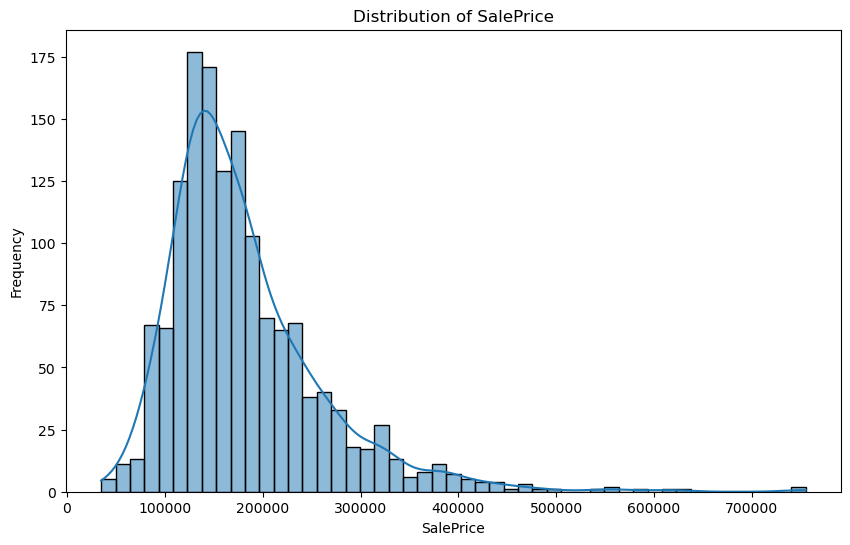

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example visualization
# For instance, visualize the distribution of SalePrice
plt.figure(figsize=(10, 6))
sns.histplot(dataset['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

# Data Preprocessing

In [ ]:
import pandas as pd

# Assuming dataset is your DataFrame containing the column 'MSZoning'
# Verify the presence of the column 'MSZoning'
if 'MSZoning' in dataset.columns:
    # Perform one-hot encoding
    encoded_df = pd.get_dummies(dataset['MSZoning'], prefix='MsZoning')

    # Concatenate the original DataFrame with the encoded DataFrame
    dataset_encoded = pd.concat([dataset, encoded_df], axis=1)

    # Drop the original 'MSZoning' column
    dataset_encoded.drop('MSZoning', axis=1, inplace=True)

    # Assign the modified DataFrame back to dataset
    dataset = dataset_encoded
else:
    print("Column 'MSZoning' does not exist in the DataFrame.")


In [ ]:
# Identify columns with string data type
string_columns = dataset.select_dtypes(include=['object']).columns

# Convert string columns to float
for col in string_columns:
    dataset[col] = pd.to_numeric(dataset[col], errors='coerce')

# Now, if there are any non-convertible values (e.g., non-numeric strings like 'N/A'), they will be converted to NaN.

In [ ]:
dataset

,Id,MSSubClass,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice,TotalArea,MsZoning_C (all),MsZoning_FV,MsZoning_RH,MsZoning_RL,MsZoning_RM
0,0,60,8450,NaN,NaN,5,2003,2003,NaN,0.0,856.0,208500.0,856.0,0,0,0,1,0
1,1,20,9600,NaN,NaN,8,1976,1976,NaN,0.0,1262.0,181500.0,1262.0,0,0,0,1,0
2,2,60,11250,NaN,NaN,5,2001,2002,NaN,0.0,920.0,223500.0,920.0,0,0,0,1,0
3,3,70,9550,NaN,NaN,5,1915,1970,NaN,0.0,756.0,140000.0,756.0,0,0,0,1,0
4,4,60,14260,NaN,NaN,5,2000,2000,NaN,0.0,1145.0,250000.0,1145.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,60,7917,NaN,NaN,5,1999,2000,NaN,0.0,953.0,175000.0,953.0,0,0,0,1,0
1456,1456,20,13175,NaN,NaN,6,1978,1988,NaN,163.0,1542.0,210000.0,1542.0,0,0,0,1,0
1457,1457,70,9042,NaN,NaN,9,1941,2006,NaN,0.0,1152.0,266500.0,1152.0,0,0,0,1,0
1458,1458,20,9717,NaN,NaN,6,1950,1996,NaN,1029.0,1078.0,142125.0,1078.0,0,0,0,1,0


In [ ]:
from sklearn.impute import SimpleImputer

# Initialize the imputer
imputer = SimpleImputer(strategy='mean')  # You can choose 'median' or 'most_frequent' as well

# Fit and transform the training data
X_train_imputed = imputer.fit_transform(X_train)

# Transform the testing data
X_test_imputed = imputer.transform(X_test)

In [ ]:
# Check for missing values
missing_values = dataset.isnull().sum()
print(missing_values)

# Handle missing values (e.g., impute with mean)
dataset.fillna(dataset.mean(), inplace=True)

# Check for infinity or large values
print(dataset.describe())

# Train your model after handling missing values and ensuring no infinity or large values are present

Id                     0
MSSubClass             0
LotArea                0
LotConfig           1460
BldgType            1460
OverallCond            0
YearBuilt              0
YearRemodAdd           0
Exterior1st         1460
BsmtFinSF2             0
TotalBsmtSF            0
SalePrice              0
TotalArea              0
MsZoning_C (all)       0
MsZoning_FV            0
MsZoning_RH            0
MsZoning_RL            0
MsZoning_RM            0
dtype: int64
                Id   MSSubClass        LotArea  LotConfig  BldgType  \
count  1460.000000  1460.000000    1460.000000        0.0       0.0   
mean    729.500000    56.897260   10516.828082        NaN       NaN   
std     421.610009    42.300571    9981.264932        NaN       NaN   
min       0.000000    20.000000    1300.000000        NaN       NaN   
25%     364.750000    20.000000    7553.500000        NaN       NaN   
50%     729.500000    50.000000    9478.500000        NaN       NaN   
75%    1094.250000    70.000000   11601.

# Model Selection and Training

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Assuming X_train and y_train are your feature and target datasets
# Replace NaN values with mean of each column
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)

# Initialize the RandomForestRegressor model
model = RandomForestRegressor()

# Create a pipeline
pipeline = Pipeline([('imputer', imputer), ('scaler', scaler), ('model', model)])

# Perform cross-validation
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean Score:", np.mean(cv_scores))


Cross-Validation Scores: [0.82509796 0.68588291 0.75139965 0.7556357  0.78890297]
Mean Score: 0.7613838373628401


In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification

# Generate sample data
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Initialize models
models = [
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('Support Vector Machine', SVC()),
    ('K-Nearest Neighbors', KNeighborsClassifier())
]

# Iterate over models
for name, model in models:
    # Create pipeline
    pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    # Perform cross-validation
    cv_scores = cross_val_score(pipeline, X, y, cv=5)
    print(f"{name} Cross-Validation Scores:", cv_scores)
    print(f"{name} Mean Score:", np.mean(cv_scores))
    print()

Random Forest Cross-Validation Scores: [0.91  0.905 0.9   0.9   0.84 ]
Random Forest Mean Score: 0.891

Gradient Boosting Cross-Validation Scores: [0.93  0.905 0.895 0.91  0.875]
Gradient Boosting Mean Score: 0.9030000000000001

Support Vector Machine Cross-Validation Scores: [0.885 0.885 0.865 0.85  0.825]
Support Vector Machine Mean Score: 0.8619999999999999

K-Nearest Neighbors Cross-Validation Scores: [0.815 0.77  0.78  0.785 0.765]
K-Nearest Neighbors Mean Score: 0.7830000000000001



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

# Performance Metrics

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define the best model based on cross-validation scores
best_model = GradientBoostingClassifier()

# Fit the best model on the entire dataset
best_model.fit(X, y)

# Make predictions on the same dataset for evaluation
y_pred = best_model.predict(X)

# Calculate evaluation metrics
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
conf_matrix = confusion_matrix(y, y_pred)

# Print evaluation metrics
print("Evaluation Metrics for the Best Model:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print(conf_matrix)


Evaluation Metrics for the Best Model:
Accuracy: 0.981
Precision: 0.9918200408997955
Recall: 0.97
F1-score: 0.9807886754297269
Confusion Matrix:
[[496   4]
 [ 15 485]]


# Data Visulaization

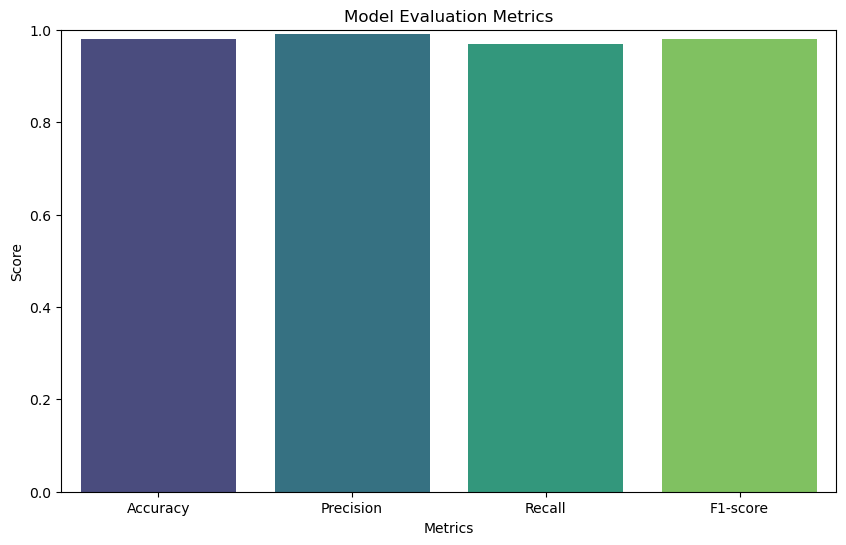

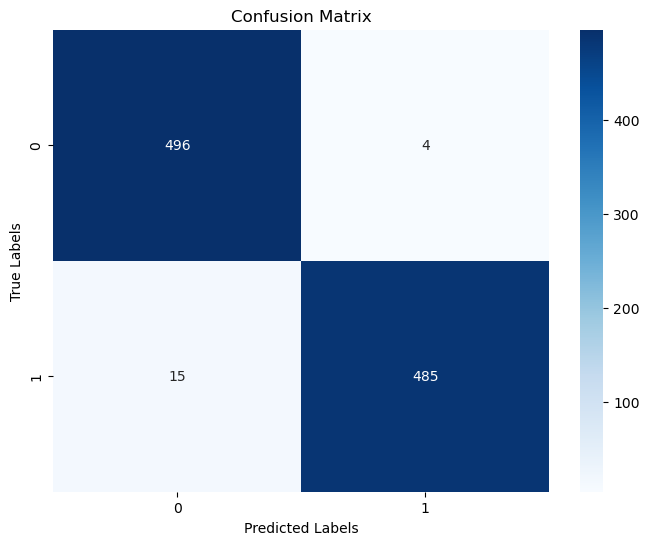

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define evaluation metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
scores = [accuracy, precision, recall, f1]

# Plot evaluation metrics
plt.figure(figsize=(10, 6))
sns.barplot(x=metrics, y=scores, palette='viridis')
plt.title('Model Evaluation Metrics')
plt.ylabel('Score')
plt.xlabel('Metrics')
plt.ylim(0, 1)  # Set the y-axis limit to be between 0 and 1
plt.show()

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()